# Advertising Sales Channel Prediction
Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# importing dataset

In [3]:
df_advertising=pd.read_csv(r'C:\Users\Rohan\OneDrive\Desktop\advertising.csv')

In [4]:
df_advertising

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df_advertising.shape

(200, 5)

In [6]:
df_advertising.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df_advertising.info

<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [8]:
df_advertising.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

## there are no null value in the dataset

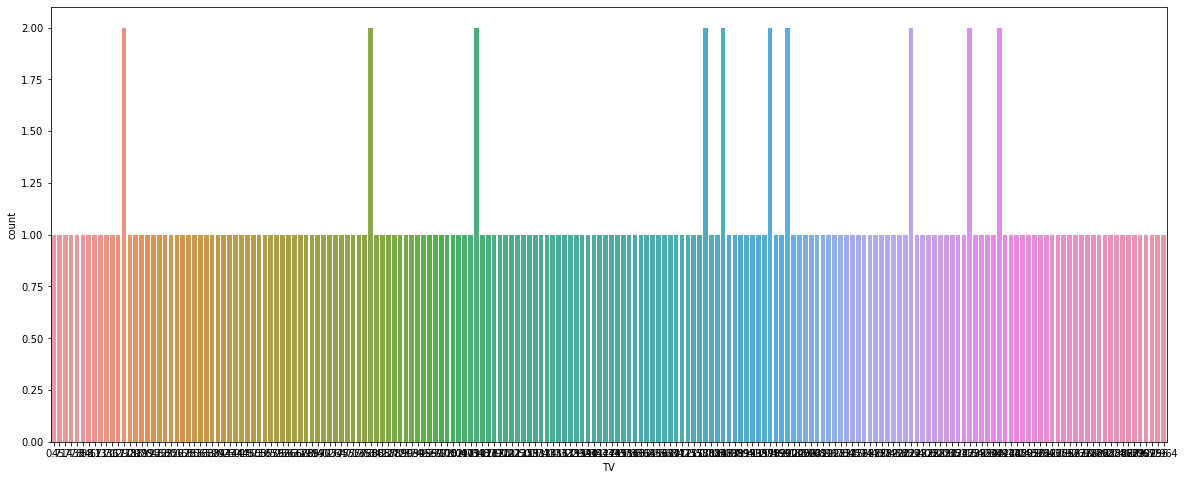

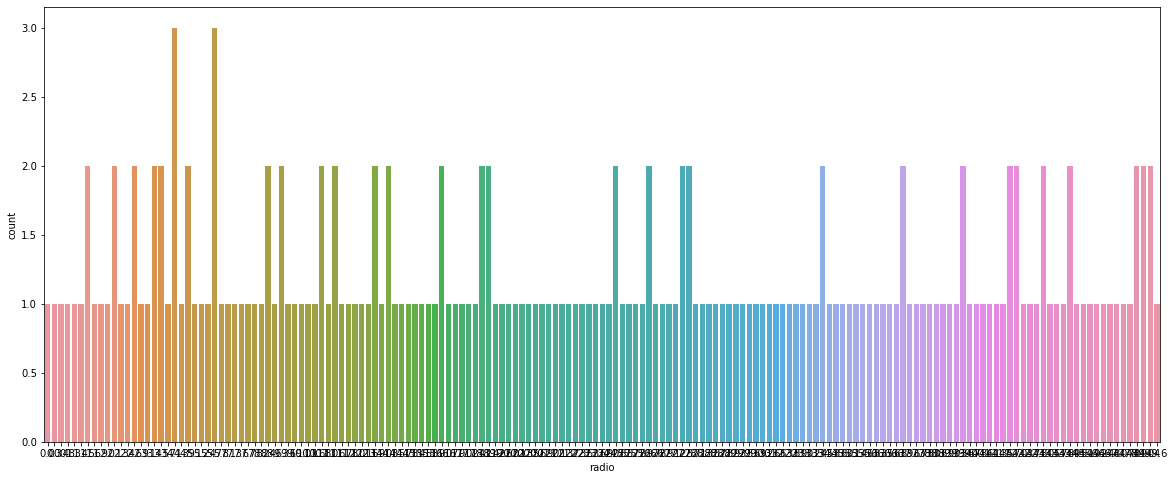

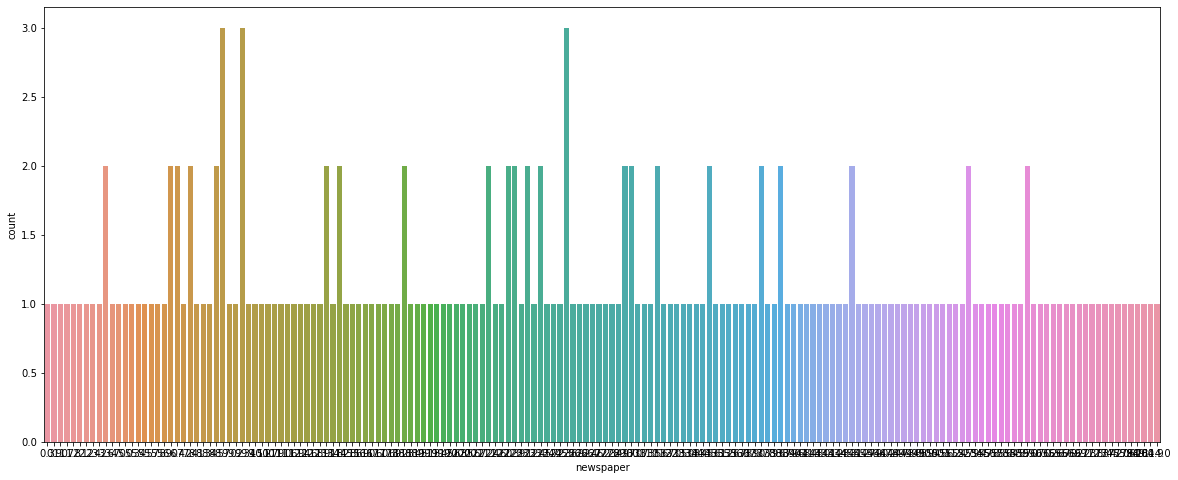

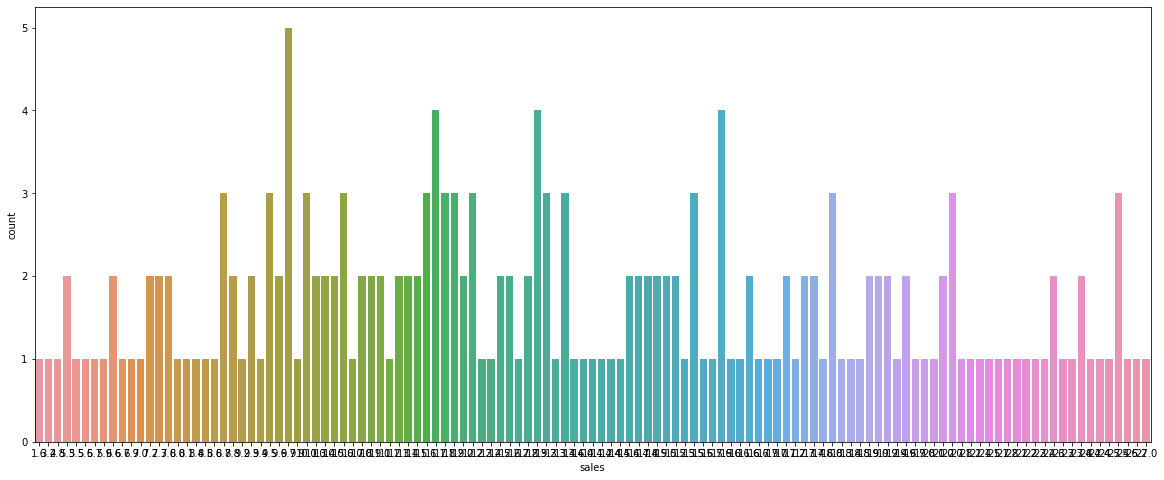

In [9]:
list=['TV','radio','newspaper','sales']
for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_advertising)

Unnamed: 0       AxesSubplot(0.125,0.826831;0.227941x0.053169)
TV            AxesSubplot(0.398529,0.826831;0.227941x0.053169)
radio         AxesSubplot(0.672059,0.826831;0.227941x0.053169)
newspaper        AxesSubplot(0.125,0.763028;0.227941x0.053169)
sales         AxesSubplot(0.398529,0.763028;0.227941x0.053169)
dtype: object

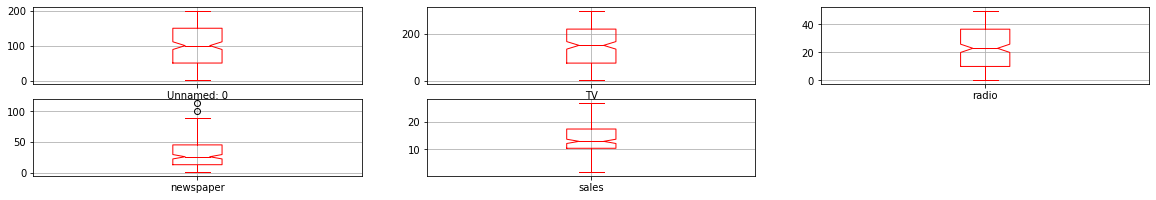

In [10]:
df_advertising.plot(kind='box',subplots=True,layout=(12,3),figsize=(20,20),grid=True,notch=True,color='red',legend=True)

# no outliers are present

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>,
        <AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

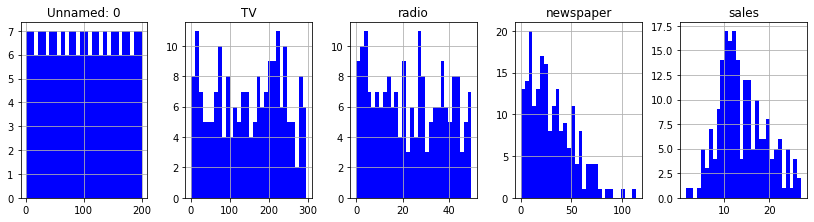

In [11]:
df_advertising.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='blue')

In [12]:
df_advertising.skew

<bound method DataFrame.skew of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [13]:
df_advertising.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [14]:
for i in df_advertising.columns:
    if df_advertising.skew().loc[i]>0.55:
        df_advertising[i]=np.log1p(df_advertising[i])

In [15]:
df_advertising.skew

<bound method DataFrame.skew of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8   4.251348   22.1
1             2   44.5   39.3   3.830813   10.4
2             3   17.2   45.9   4.252772    9.3
3             4  151.5   41.3   4.085976   18.5
4             5  180.8   10.8   4.084294   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7   2.694627    7.6
196         197   94.2    4.9   2.208274    9.7
197         198  177.0    9.3   2.001480   12.8
198         199  283.6   42.0   4.207673   25.5
199         200  232.1    8.6   2.272126   13.4

[200 rows x 5 columns]>

# bivariant analysis

# relation between tv and sales

<AxesSubplot:xlabel='sales', ylabel='TV'>

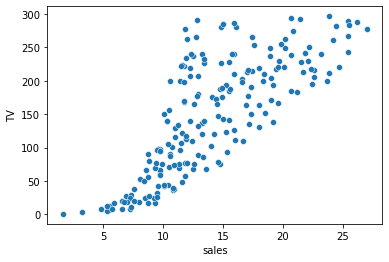

In [24]:
sns.scatterplot(y="TV",x="sales",data=df_advertising)


<AxesSubplot:xlabel='sales', ylabel='radio'>

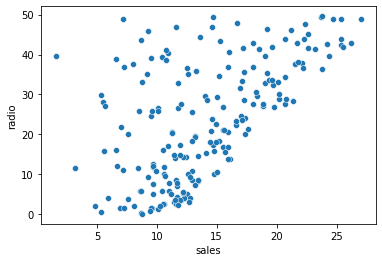

In [25]:
sns.scatterplot(y="radio",x="sales",data=df_advertising)

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

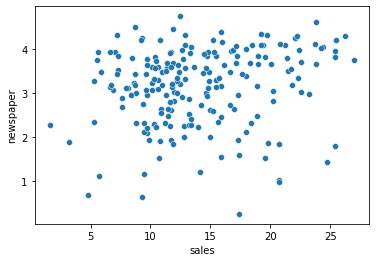

In [26]:
sns.scatterplot(y="newspaper",x="sales",data=df_advertising)

# spliting x and y

In [28]:
x=df_advertising.drop(["sales"],axis=1)

In [29]:
x.shape

(200, 4)

In [30]:
y=df_advertising["sales"]

In [31]:
y.shape

(200,)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
maxScore=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predlm=lm.predict(x_test)
    sc=lm.score(x_train,y_train)
    if sc>maxScore:
        maxScore=sc
        maxRs=i
print("Best Accuracy is ", maxScore,"on Random_State",maxRs)

Best Accuracy is  0.9212787734721382 on Random_State 189


In [35]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=189)

In [36]:
x_train.shape

(160, 4)

In [37]:
y_train.shape

(160,)

In [38]:
x_test.shape

(40, 4)

In [39]:
y_test.shape

(40,)

In [40]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [41]:
lm.coef_

array([-0.0020755 ,  0.04151348,  0.20514899, -0.02918379])

In [42]:
lm.intercept_

3.616074895593478

In [43]:
lm.score(x_train,y_train)

0.9212787734721382

In [44]:
pred=lm.predict(x_test)
print("predicted ",pred)
print("actual",y_test)

predicted  [23.46973522  4.81722542 13.74052942 21.12009889 12.99347451 19.17710564
 16.85870995 11.43083446 16.6604478  12.3272262  14.22388876 10.20972769
  6.58853935 13.61610671 16.12054668 10.85667481 17.5505199  20.44290047
 11.65517837 19.22331444 21.40617993  7.11329448 24.66802522 12.83114882
 13.87018736  9.23578049 12.1619236  16.96064759 19.66689484  9.65810538
 12.62410888  9.13230798 14.13584587 14.91520917 11.54150023 13.79904202
  9.72635942 22.97740992 18.5202054  12.33262833]
actual 198    25.5
91      7.3
43     12.9
111    21.8
75      8.7
142    20.1
27     15.9
130     1.6
37     14.7
136     9.5
77     14.2
180    10.5
106     7.2
2       9.3
114    14.6
71     12.4
163    18.0
53     21.2
12      9.2
133    19.6
30     21.4
107     8.7
175    27.0
167    12.2
5       7.2
132     5.7
67     13.4
187    17.3
176    20.2
29     10.5
6      11.8
13      9.7
81     12.3
135    11.6
126     6.6
112    14.1
44      8.5
61     24.2
105    19.2
9      10.6
Name: sales, d

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('error:')

print('Mean Absolute error: ',mean_absolute_error(y_test,pred))

print('Mean Squared error: ',mean_squared_error(y_test,pred))

print('Root Mean Squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean Absolute error:  1.8383048273229114
Mean Squared error:  7.129760268073068
Root Mean Squared error:  2.6701610940302962


In [46]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7926726278516304


In [47]:
import joblib
joblib.dump(lm,"sales.obj")

['sales.obj']